In [204]:
#coding:utf-8
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

#coding:utf-8
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [205]:
#Read excel files
file_stock = "data/各指数PE.xls"
file_bond = "data/十年期国债收益率.xlsx"

#start_time = datetime.datetime(2008, 8, 1)
#end_time = datetime.datetime(2017, 8, 1)
start_time = "2009-10-20"
end_time = "2022-09-23"

#Read data from files
stock =  pd.read_excel(file_stock,sheet_name = None, names=["Code","Name","Date","PE"],dtype={'Code': str, 'Name': str,'PE':np.float64},parse_dates=['Date'],index_col='Date')



for key in stock:
    stock[key].insert(0,'1/PE',stock[key]["PE"].rdiv(100) )


bond = pd.read_excel(file_bond,dtype=np.float64,names=["Date","Bond Yield"],parse_dates=['Date'],index_col='Date').sort_index()

bond_reciprocal=bond.rdiv(100)


#Get the data between given interval of time 

for key in stock:
    stock[key]=stock[key].loc[start_time:end_time]
    


bond_interval=bond.loc[start_time:end_time]
bond_reciprocal_interval=bond_reciprocal.loc[start_time:end_time]
print(bond_interval)
print(bond_reciprocal_interval)


for key in stock:
    stock[key]=pd.merge(stock[key],bond_interval, how='inner', left_index=True, right_index=True)
    stock[key].insert(0,'Ratio', stock[key]["1/PE"].div( stock[key]["Bond Yield"]) )
    #ratio[key]["PE"]=ratio[key]["PE"].div(bond_interval)

# merge by date indexes to get intersection part of dji and exchange rates
#df_merge=pd.merge(dji_interval,exchange_rate_interval, how='inner', left_index=True, right_index=True)

            Bond Yield
Date                  
2009-10-20    3.637382
2009-10-21    3.638973
2009-10-22    3.650444
2009-10-23    3.685956
2009-10-26    3.638549
...                ...
2022-09-16    2.678800
2022-09-19    2.676800
2022-09-20    2.666900
2022-09-21    2.649200
2022-09-22    2.647500

[3086 rows x 1 columns]
            Bond Yield
Date                  
2009-10-20   27.492299
2009-10-21   27.480278
2009-10-22   27.393925
2009-10-23   27.130004
2009-10-26   27.483480
...                ...
2022-09-16   37.330148
2022-09-19   37.358039
2022-09-20   37.496719
2022-09-21   37.747244
2022-09-22   37.771483

[3086 rows x 1 columns]


In [194]:
print(stock)

{'000001.SH':                Ratio      1/PE       Code  Name       PE  Bond Yield
Date                                                                
2009-10-20  0.900864  3.276787  000001.SH  上证指数  30.5177    3.637382
2009-10-21  0.910881  3.314672  000001.SH  上证指数  30.1689    3.638973
2009-10-22  0.915104  3.340538  000001.SH  上证指数  29.9353    3.650444
2009-10-23  0.887701  3.272026  000001.SH  上证指数  30.5621    3.685956
2009-10-26  0.905960  3.296381  000001.SH  上证指数  30.3363    3.638549
...              ...       ...        ...   ...      ...         ...
2022-09-16  3.063942  8.207687  000001.SH  上证指数  12.1837    2.678800
2022-09-19  3.074837  8.230724  000001.SH  上证指数  12.1496    2.676800
2022-09-20  3.081686  8.218548  000001.SH  上证指数  12.1676    2.666900
2022-09-21  3.105721  8.227676  000001.SH  上证指数  12.1541    2.649200
2022-09-22  3.115225  8.247559  000001.SH  上证指数  12.1248    2.647500

[3005 rows x 6 columns], '000016.SH':                Ratio       1/PE       Code  Name  

In [36]:
print(bond_reciprocal)

            Bond Yield
Date                  
2022-09-22    0.377715
2022-09-21    0.377472
2022-09-20    0.374967
2022-09-19    0.373580
2022-09-16    0.373301
...                ...
2009-10-26    0.274835
2009-10-23    0.271300
2009-10-22    0.273939
2009-10-21    0.274803
2009-10-20    0.274923

[3086 rows x 1 columns]


In [178]:
 print(stock_interval["000688.SH"])

                 Code  Name        PE
Date                                 
2020-07-24  000688.SH  科创50  1.237146
2020-07-27  000688.SH  科创50  1.253551
2020-07-31  000688.SH  科创50  1.150167
2020-08-05  000688.SH  科创50  1.095552
2020-08-06  000688.SH  科创50  1.106749
...               ...   ...       ...
2022-09-16  000688.SH  科创50  2.382569
2022-09-19  000688.SH  科创50  2.437039
2022-09-20  000688.SH  科创50  2.408205
2022-09-21  000688.SH  科创50  2.440233
2022-09-22  000688.SH  科创50  2.428989

[523 rows x 3 columns]


Text(0, 0.5, 'P/E值')

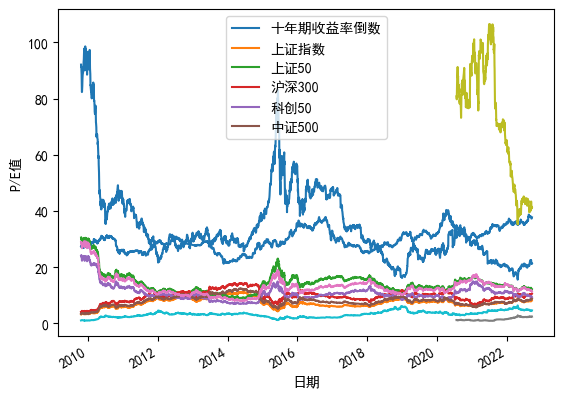

In [195]:
#names = []
#ax=bond_reciprocal_interval.plot()
#names.append('十年期收益率倒数')  
#stock_interval["000001.SH"].plot(ax=ax)
#stock_interval["000016.SH"].plot(ax=ax)


#for key in stock_interval:
#    stock_interval[key].plot(ax=ax)
 #   names.append(stock_interval[key].Name.iloc[0]) 


#ax.legend(names)
#plt.xlabel("日期")
#plt.ylabel("P/E值")

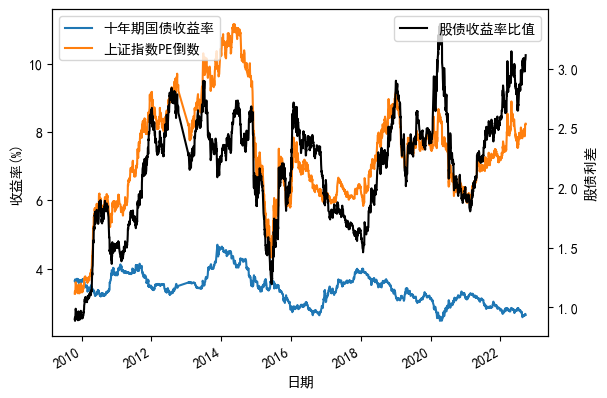

In [245]:
###########fig=plt.figure()
##########plt.title('Title')
#########names = []
########ax1=bond_interval.plot()
#######names.append('十年期国债收益率')



######stock["000001.SH"]["1/PE"].plot(ax=ax1)
#####names.append("上证指数PE倒数") 


####ax2=stock["000001.SH"]["Ratio"].plot(secondary_y="Ratio")


###print(names)
##ax.legend(names)

#ax.set_xlabel('日期')
#ax.set_ylabel('收益率(%)')
#ax.right_ax.set_ylabel('股债利差')
#plt.show()

names = []

#fig,ax1=plt.subplots() #subplots一定要带s
ax1=bond_interval.plot()

names.append('十年期国债收益率')
stock["000001.SH"]["1/PE"].plot(ax=ax1)
names.append("上证指数PE倒数") 
ax1.set_ylabel('收益率(%)')
ax2=ax1.twinx() #twinx将ax1的X轴共用与ax2，这步很重要

stock["000001.SH"]["Ratio"].plot(ax=ax2,secondary_y="Ratio",color='k',label="股债收益率比值")
#ax2.right_ax.set_ylabel('股债利差')
ax2.set_ylabel('股债利差')
ax1.legend(names,loc='upper left')

ax2.legend(loc='upper right')
ax1.set_xlabel('日期')
plt.show()

